In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from sklearn.cluster import KMeans

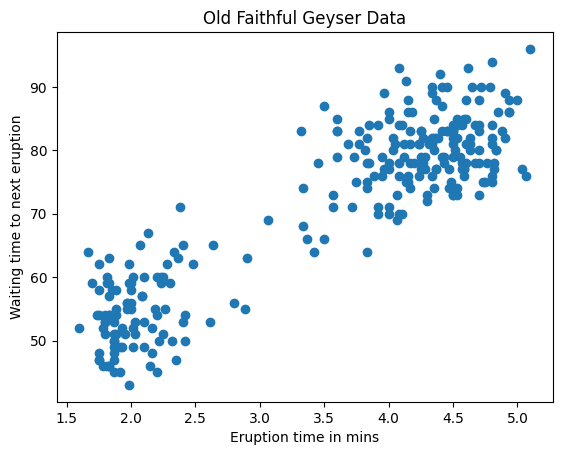

In [6]:
# Read the .dat file into a pandas DataFrame
df = pd.read_fwf('faithful.dat', skiprows=26, names=['eruptions', 'waiting'])
data = df
# Plot the data points
plt.scatter(df['eruptions'], df['waiting'])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Old Faithful Geyser Data')
plt.show()

data = np.array(data)

## EM Algorithm for Gaussian Mixture Model (Problem b & c)


### E-Step
Recall that EM learns the parameter $\theta$ of a Gaussian mixture model $P_{\theta}(x,z)$ over a dataset $D = \{ x^{(i)} \mid i = 1, 2, 3, \ldots, n \}$ by performing the E-step and the M-step for $t = 0, 1, 2, \ldots$. We repeat the E-step and M-step until convergence. In the E-step, for each $x^{(i)} \in D$, we compute a vector of probabilities $P_{\theta_{t}}(z=k|x)$ for the event that each $x^{(i)}$ originates from a cluster $k$ given the current set of parameters $\theta$.

First step: Write the expression for $P_{\theta_{t}}(z=k|x)$, which is the posterior of each data point $x^{(i)}$. Recall that by Bayes' rule:


$$P_{\theta_{t}}(z=k|x) = \frac{p_{\theta_{t}}(z=k,x)}{p_{\theta_{t}}(x)} = \frac{P_{\theta_{t}}(z=k,x)}{\sum_{l=1}^K(P_{\theta_{t}}(x|z=l)P_{\theta_{t}}(z=l))}$$

Write the expression for $P_{θ_{t}} (z = k | x)$, which is the posterior of each data point $x^{(i)}$.

$$
= P_{\theta_{t}}(z=k|x) = \frac{P_{\theta_{t}}(x^{(i)}|z=k)P_{\theta_{t}}(z=k)}{\sum_{l=1}^K P_{\theta_{t}}(x^{(i)}|z=l)P_{\theta_{t}}(z=l)}
$$





### M-Step

In the M-step, we compute new parameters $\theta_{t+1}$. Our goal is to find $\mu_k$, $\Sigma_k$, and $\phi_k$ that maximize the expected log-likelihood of the data, which is given by the following expression: $$\text{max}_{\theta}(\sum_{k=1}^K\sum_{x \in D})P_{\theta_{t}}(z_{k}|x)logP_{\theta}(x|z_{k}) + \sum_{k=1}^K\sum_{x \in D}P_{\theta}(z_{k}|x)logP_{\theta}(z_{k})$$

Write down the formula for $\mu_{k}, \sum_{k}$, and for the parameters $\phi$ at the M-step. 
==============================

## M-Step

1. Compute the new parameters $\theta_{t+1}$ that maximize the expected log-likelihood of the data, given by:

$$
\text{max}_{\theta} \left( \sum_{k=1}^K \sum_{x \in D} P_{\theta_t}(z=k|x) \log P_{\theta}(x|z=k) + \sum_{k=1}^K \sum_{x \in D} P_{\theta_t}(z=k|x) \log P_{\theta}(z=k) \right)
$$

2. Take the derivative of the expression with respect to each parameter and set it to zero.

### Mean $\mu_k$

1. Compute the numerator of the mean parameter:

$$
\sum_{x \in D} P_{\theta_t}(z=k|x) \cdot x
$$

2. Compute the denominator of the mean parameter:

$$
\sum_{x \in D} P_{\theta_t}(z=k|x)
$$

3. Divide the numerator by the denominator to get the new mean parameter:

$$
\mu_k = \frac{\sum_{x \in D} P_{\theta_t}(z=k|x) \cdot x}{\sum_{x \in D} P_{\theta_t}(z=k|x)}
$$

### Covariance $\Sigma_k$

1. Compute the numerator of the covariance parameter:

$$
\sum_{x \in D} P_{\theta_t}(z=k|x) \cdot (x - \mu_k)(x - \mu_k)^T
$$

2. Compute the denominator of the covariance parameter:

$$
\sum_{x \in D} P_{\theta_t}(z=k|x)
$$

3. Divide the numerator by the denominator to get the new covariance parameter:

$$
\Sigma_k = \frac{\sum_{x \in D} P_{\theta_t}(z=k|x) \cdot (x - \mu_k)(x - \mu_k)^T}{\sum_{x \in D} P_{\theta_t}(z=k|x)}
$$

### Mixing Coefficient $\phi_k$

1. Compute the numerator of the mixing coefficient:

$$
\sum_{x \in D} P_{\theta_t}(z=k|x)
$$

2. Divide the numerator by the total number of data points $N$ to get the new mixing coefficient:

$$
\phi_k = \frac{1}{N} \sum_{x \in D} P_{\theta_t}(z=k|x)
$$

where $N$ is the total number of data points in $D$.


# D (ii).  Rationale for selecting our Termination Criterion for EM:
## if np.abs(log_likelihoods[i] - log_likelihoods[i - 1]) < self.epsilon:
The use of the log-likelihood difference as a termination criterion is a common and effective approach in Gaussian Mixture Model (GMM) fitting for several reasons:

* Objective Function Monitoring: The log-likelihood is the objective function that the Expectation-Maximization (EM) algorithm aims to maximize. Monitoring its value provides direct insight into how well the algorithm is performing.

* Convergence Indication: A small change in log-likelihood between consecutive iterations suggests that the algorithm is converging to a local maximum. This is an indication that further iterations are unlikely to result in significant improvements.

* Numerical Stability: Using the log-likelihood (as opposed to the likelihood) is numerically more stable, especially when dealing with very small or very large numbers.

* Efficiency: Checking the difference in log-likelihood is computationally inexpensive, making it a cost-effective way to decide when to terminate the algorithm.

* User Control: The epsilon parameter allows the user to control the sensitivity of the termination criterion. A smaller epsilon will result in a more accurate model but may require more iterations to converge.

* Early Stopping: This criterion allows for the possibility of early stopping, which can significantly reduce the computational cost if the algorithm is close enough to the optimal solution.

* General Applicability: This criterion is not specific to any particular data distribution or domain, making it generally applicable.

In [7]:
class GMM:
    def __init__(self, num_components=2, epsilon=1e-6, means=None, covariances=None, weights=None):
        """
        :param num_components: number of gaussian components
        :param epsilon: Small constant for regularization and convergence check
        :param means: Initial means. If not given, will be computed base on data when fit() is called
        :param covariances: Initial means. If not given, will be computed base on data when fit() is called
        :param weights: Initial means. If not given, will be computed base on data when fit() is called
        """
        self.num_components = num_components
        self.epsilon = epsilon
        self.means = means
        self.covariances = covariances
        self.weights = weights
        self.k = None  # used to store dimensionality of the data

    def _initialize(self, data):
        """
        Initializes means, covariances, weights and data dimensionality of the GMM given the input data.
        Initializes each parameter if the initial value is not already set during GMM instantiation see __init__(...)
        :param data: input data. Shape (num_samples x data_dimensionality)
        """
        self.k = data.shape[1]  # data dimensionality

        if self.means is None:
            # Initialize means with random values in range min(data), max(data) for each dimension
            self.means = np.random.rand(self.num_components, self.k) * (
                        np.max(data, axis=0) - np.min(data, axis=0)) + np.min(data, axis=0)

        if self.covariances is None:
            # Initialize covariance matrices; identity matrices
            self.covariances = np.repeat(np.eye(self.k)[np.newaxis, ...], self.num_components, axis=0)

        if self.weights is None:
            # Initialize weights uniformly
            self.weights = np.ones(self.num_components) / self.num_components

    def gaussian_pdf(self, x, mean, covariance):
        """
        Computes the Gaussian probability of x given mean, and covariance.
        :param x: input data. Shape (n_samples x data_dimensionality). Use np.array().
        :param mean: mean of a single Gaussian.
        :param covariance: covariance of a single Gaussian
        :return: probability
        """
        numerator = np.exp(-0.5 * np.sum(np.matmul((x - mean), np.linalg.inv(covariance)) * (x - mean), axis=1))
        denominator = np.sqrt(np.power((2 * np.pi), x.shape[1]) * np.linalg.det(covariance))

        return numerator / denominator

    def e_step(self, data):
        """
        For each sample in data, computes the probability of that sample belonging to each of Gaussian components
        :param data: input data. Shape (n_samples x data_dimensionality). Use np.array().
        :return: (n_samples x num_components) matrix.
        Each row sums up to 1, i.e., contains the probability for each Gaussian component
        """
        data_prob = np.array(
            [w * self.gaussian_pdf(data, m, c) for m, c, w in zip(self.means, self.covariances, self.weights)]).T

        return data_prob / np.maximum(np.sum(data_prob, axis=1, keepdims=True), self.epsilon)

    def m_step(self, data, data_prob):
        """
        Update parameter of each Gaussian component.
        :param data: input data. Shape (n_samples x data_dimensionality). Use np.array().
        :param data_prob: (n_samples x num_components) matrix returned by the e_step().
        """
        for i in range(self.num_components):
            comp_data_prob = data_prob[:, i][..., np.newaxis]
            total_comp_data_prob = np.maximum(np.sum(comp_data_prob), self.epsilon)
            self.means[i] = np.sum(data * comp_data_prob, axis=0) / total_comp_data_prob
            self.covariances[i] = np.dot((comp_data_prob * (data - self.means[i])).T,
                                         data - self.means[i]) / total_comp_data_prob
            self.weights[i] = total_comp_data_prob / len(data)

    def log_likelihood(self, data):
        """
        Compute log likelihood of the data w.r.t the current GMM means, covariances and weights.
        :param data: input data. Shape (n_samples x data_dimensionality). Use np.array().
        :return: log likelihood of the data. A single integer.
        """
        return np.sum(np.log(
            [np.sum(w * self.gaussian_pdf(data, m, c)) for m, c, w in zip(self.means, self.covariances, self.weights)]))

    def visualize(self, data):
        """
        Visualizes the input data and current GMM.
        :param data: input data. Shape (n_samples x data_dimensionality). Use np.array().
        """
        # Define the grid for visualization
        x, y = np.meshgrid(np.sort(data[:, 0]), np.sort(data[:, 1]))
        # Stack all (x, y) coordinates in a matrix of shape (n_samples*2 x 2)
        xy = np.hstack((x.reshape((-1, 1)), y.reshape((-1, 1))))

        plt.figure()
        # Plot the data
        plt.scatter(data[:, 0], data[:, 1])
        colors = ['r', 'b']
        # Plot the mean adn contours of each Gaussian component.
        for i in range(self.num_components):
            plt.scatter(self.means[i, 0], self.means[i, 1], c=colors[i])

            plt.contour(np.sort(data[:, 0]), np.sort(data[:, 1]),
                        self.gaussian_pdf(xy, self.means[i], self.covariances[i]).reshape((len(data), len(data))))
            plt.savefig('./photo/MM_visualize.png')
            
        plt.show()


    def fit(self, data, num_iterations=100, visualize=False):
        """
        Fit GMM to the data/ 
        :param data: input data. Shape (n_samples x data_dimensionality). Use np.array().
        :param num_iterations: maximum number of iterations that will be performed if log likelihood does not converge
        w.r.t. the epsilon (see __init__())
        :param visualize: whether to visualize estimated GMM in each iteration.
        """
        # Initialize means, covariances, and weights based on data
        self._initialize(data)

        # Used to store estimated means for each iteration
        means_trajectories = np.array(self.means)[np.newaxis, ...]
        # Used to store log likelihood for each iteration
        log_likelihoods = np.array(self.log_likelihood(data))

        print(f'Initial log-likelihood: {log_likelihoods}')
        if visualize:
            self.visualize(data)

        for i in range(num_iterations):
            # compute E step
            data_prob = self.e_step(data)
            # compute M step
            self.m_step(data, data_prob)

            # store estimated data
            means_trajectories = np.append(means_trajectories, self.means[np.newaxis, ...], axis=0)
            log_likelihoods = np.append(log_likelihoods, self.log_likelihood(data))

            print(f'Iteration {i + 1}, Log-likelihood: {log_likelihoods[i]}')

            if visualize:
                self.visualize(data)

            # Check for convergence:
            # stop if the difference between the last two log-likelihoods is less than epsilon (provided in __init__())
            # This is our termination criterion
            if np.abs(log_likelihoods[i] - log_likelihoods[i - 1]) < self.epsilon:
                print(f"Convergence reached in {i + 1} iterations. This is also our termination criterion")
                break

        return means_trajectories, log_likelihoods

    @staticmethod
    def plot_means_trajectories(data, means_trajectories):
        """
        A helper function to plot trajectory for each components' mean. Assumes data dimensionality is 2.
        :param data: input data. Shape (num_samples x data_dimensionality)
        :param means_trajectories: for each iteration, means values for each component.
        Shape (num_iteration x num_components x data_dimensionality)
        In the `plot_means_trajectories` method, the `means_trajectories` argument is a 3D array of shape 
        `(num_iteration x num_components x data_dimensionality)`, where `num_iteration` is the number of iterations and `num_components` is the number of Gaussian components. 
        The means values are stored in the `means_trajectories` array. Specifically, the `trajectory` variable in the for loop represents the trajectory of the means for a single Gaussian component. 
        The first column of `trajectory` represents the mean value for the first dimension, and the second column represents the mean value for the second dimension. 
        In the for loop, the initial mean value is plotted using `plt.plot(trajectory[0, 0], trajectory[0, 1], f'{colors[i]}x', label=f"Mean {i + 1} start")`, and 
        the final mean value is plotted using `plt.plot(trajectory[-1, 0], trajectory[-1, 1], f'{colors[i]}s', label=f"Mean {i + 1} end")`. The trajectory of the means is plotted using `plt.plot(trajectory[:, 0], trajectory[:, 1], colors[i])`.
        """
        plt.figure()

        # Plot the input data
        plt.scatter(data[:, 0], data[:, 1])

        colors = ['r', 'b']
        # We want to plot trajectory for each gaussian component, which means that we need to iterate over components.
        # Hence, we have to transpose  means_trajectories from (num_iteration x num_components x data_dimensionality)
        # to (num_components x num_iteration x data_dimensionality)
        for i, trajectory in enumerate(np.transpose(means_trajectories, (1, 0, 2))):
            # Plot initial mean
            plt.plot(trajectory[0, 0], trajectory[0, 1], f'{colors[i]}x', label=f"Mean {i + 1} start")
            # Plot last mean
            plt.plot(trajectory[-1, 0], trajectory[-1, 1], f'{colors[i]}s', label=f"Mean {i + 1} end")
            # Plot trajectory
            plt.plot(trajectory[:, 0], trajectory[:, 1], colors[i])

        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        plt.legend()
        plt.title("Trajectories of Mean Vectors")
        plt.savefig('./photo/Mean_trajectory.png')
        plt.show()


    @staticmethod
    def plot_log_likelihoods(log_likelihoods):
        """
        A helper function to plot log likelihoods
        :param log_likelihoods: log likelihood for each iteration. Shape: (num_iteration, 1)
        :return:
        """
        plt.figure()
        plt.plot(np.arange(len(log_likelihoods)), log_likelihoods)
        plt.xlabel("Iteration")
        plt.ylabel("Log likelihood")
        plt.title("Log likelihoods")
        plt.savefig('./photo/Log_likelihoods.png')
        plt.show()

    @staticmethod
    def visualize_gmm_boundaries_static(gmm_model, X):
        x_min, x_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1
        y_min, y_max = np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                            np.linspace(y_min, y_max, 100))

        Z = np.c_[xx.ravel(), yy.ravel()]
        log_probs = np.zeros((Z.shape[0], gmm_model.num_components))

        for i in range(gmm_model.num_components):
            log_probs[:, i] = np.log(gmm_model.weights[i]) + np.log(gmm_model.gaussian_pdf(Z, gmm_model.means[i], gmm_model.covariances[i]))

        log_probs_max = np.max(log_probs, axis=1)
        log_likelihood = np.log(np.sum(np.exp(log_probs - log_probs_max[:, np.newaxis]) * gmm_model.weights, axis=1)) + log_probs_max
        Z = log_likelihood.reshape(xx.shape)

        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, norm=LogNorm())

        for i in range(gmm_model.num_components):
            plt.contour(xx, yy, log_probs[:, i].reshape(xx.shape), levels=np.logspace(0, 1, 1), colors='k')

        plt.scatter(X[:, 0], X[:, 1], edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.savefig('./photo/GMM_boundaries.png')
        plt.show()


Initial log-likelihood: -1.7464360470523204


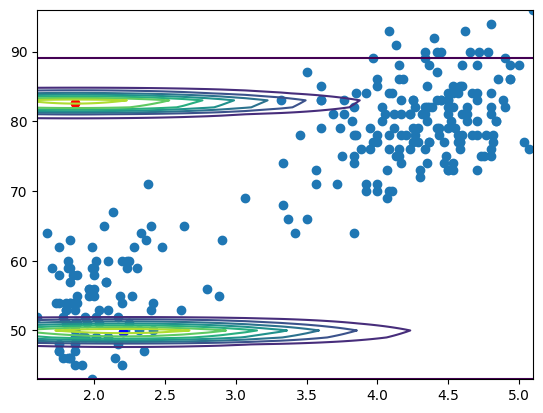

Iteration 1, Log-likelihood: -1.7464360470523204


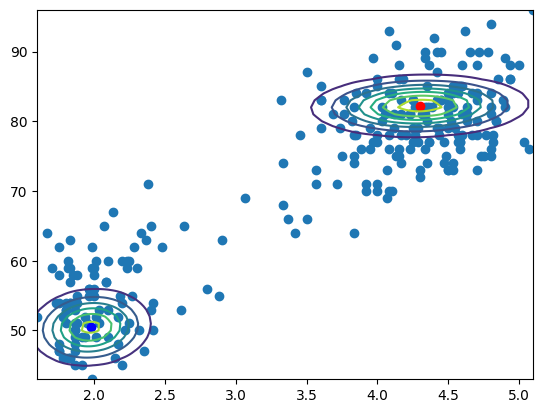

Iteration 2, Log-likelihood: 1.1279307465758963


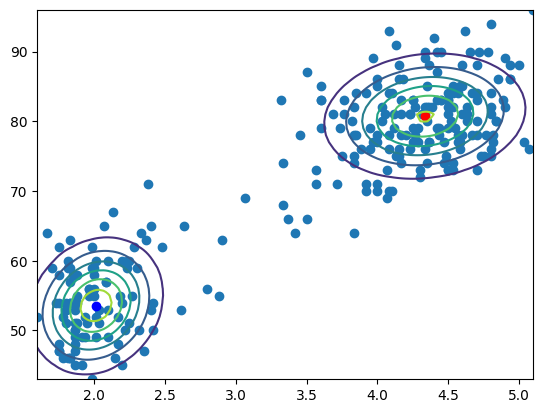

Iteration 3, Log-likelihood: 2.0592340295604674


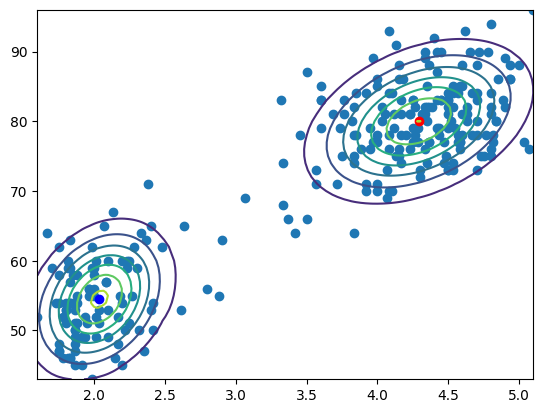

Iteration 4, Log-likelihood: 2.0021849318428604


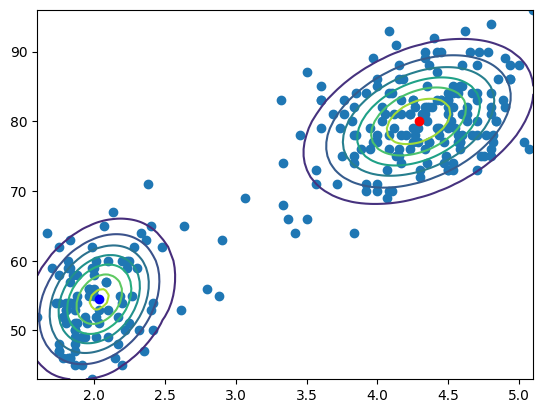

Iteration 5, Log-likelihood: 2.0027053773848005


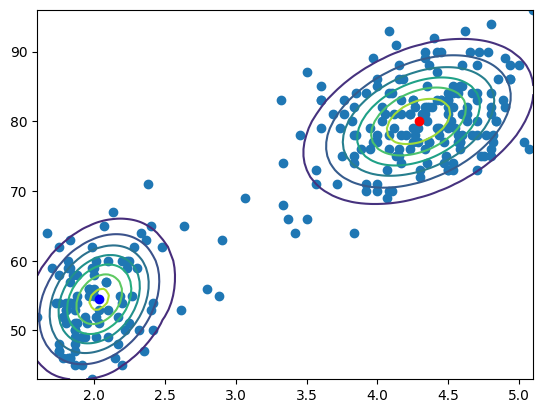

Iteration 6, Log-likelihood: 2.0029795372943706


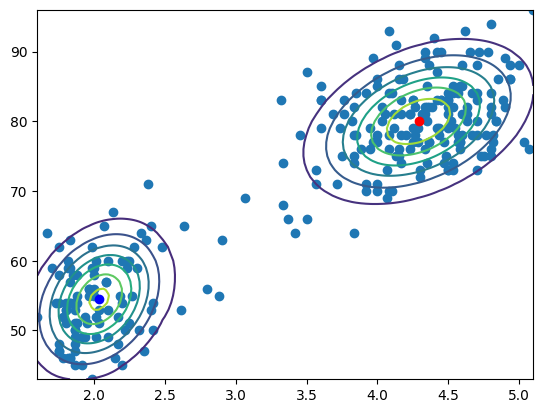

Iteration 7, Log-likelihood: 2.003042242573622


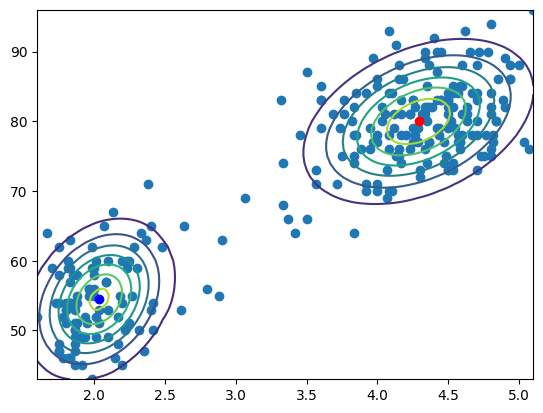

Iteration 8, Log-likelihood: 2.0030570879064995


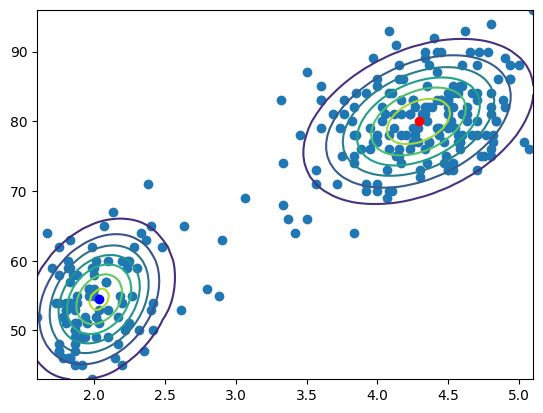

Iteration 9, Log-likelihood: 2.0030606475073593


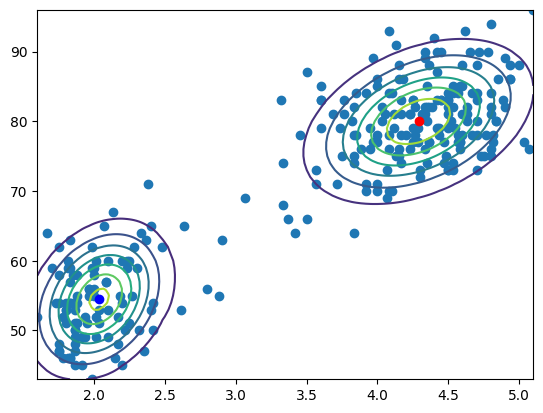

Iteration 10, Log-likelihood: 2.0030615036945054


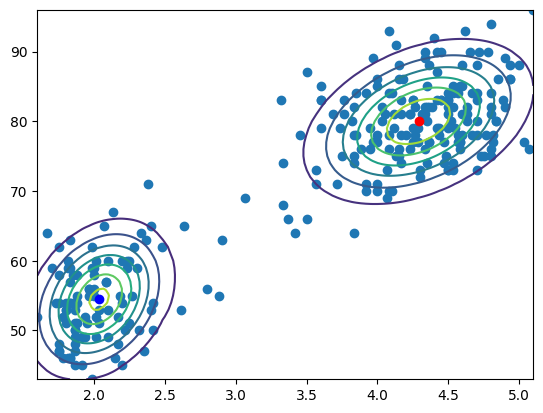

Convergence reached in 10 iterations. This is also our termination criterion
[3.6   1.8   3.333 2.283 4.533 2.883 4.7   3.6   1.95  4.35  1.833 3.917
 4.2   1.75  4.7   2.167 1.75  4.8   1.6   4.25  1.8   1.75  3.45  3.067
 4.533 3.6   1.967 4.083 3.85  4.433 4.3   4.467 3.367 4.033 3.833 2.017
 1.867 4.833 1.833 4.783 4.35  1.883 4.567 1.75  4.533 3.317 3.833 2.1
 4.633 2.    4.8   4.716 1.833 4.833 1.733 4.883 3.717 1.667 4.567 4.317
 2.233 4.5   1.75  4.8   1.817 4.4   4.167 4.7   2.067 4.7   4.033 1.967
 4.5   4.    1.983 5.067 2.017 4.567 3.883 3.6   4.133 4.333 4.1   2.633
 4.067 4.933 3.95  4.517 2.167 4.    2.2   4.333 1.867 4.817 1.833 4.3
 4.667 3.75  1.867 4.9   2.483 4.367 2.1   4.5   4.05  1.867 4.7   1.783
 4.85  3.683 4.733 2.3   4.9   4.417 1.7   4.633 2.317 4.6   1.817 4.417
 2.617 4.067 4.25  1.967 4.6   3.767 1.917 4.5   2.267 4.65  1.867 4.167
 2.8   4.333 1.833 4.383 1.883 4.933 2.033 3.733 4.233 2.233 4.533 4.817
 4.333 1.983 4.633 2.017 5.1   1.8   5.033 4.    2.

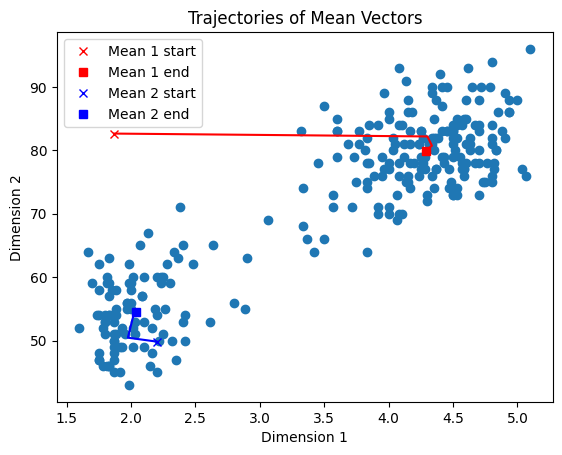

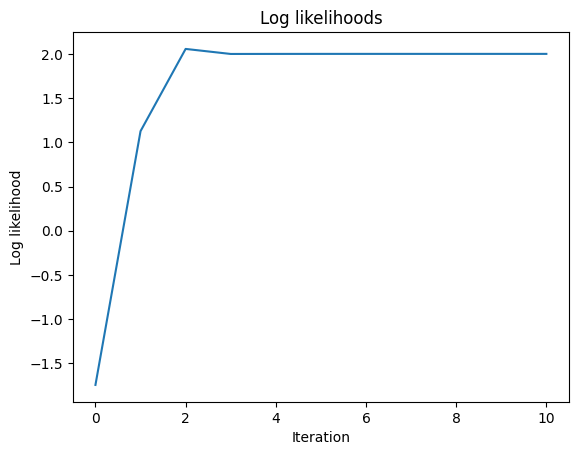

/var/folders/nr/9dz9m8pd2752bz2rmpkbrcs40000gn/T/ipykernel_21262/2779293998.py:228: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], edgecolors='k', cmap=plt.cm.Paired)


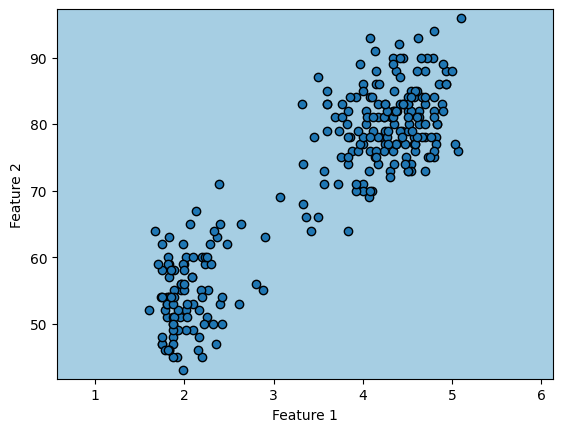

In [8]:
gmm = GMM(num_components=2)

mean_trajectories, log_likelihoods = gmm.fit(data, visualize=True)

gmm.plot_means_trajectories(data, mean_trajectories)
gmm.plot_log_likelihoods(log_likelihoods)
gmm.visualize_gmm_boundaries_static(gmm, data)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


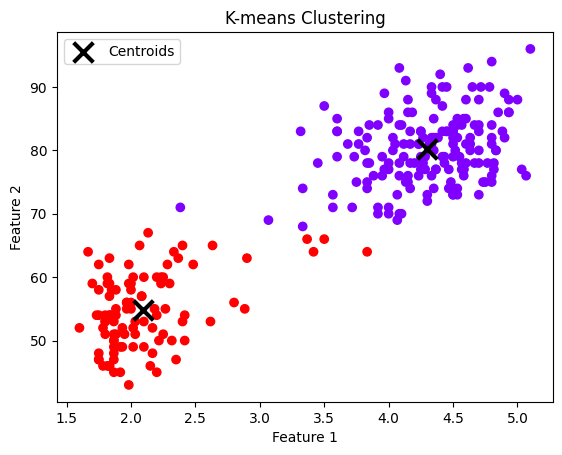

In [9]:
# K-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

# Visualize K-means clustering
plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='rainbow')
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], marker='x', s=200, linewidths=3, color='k', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.savefig('./photo/K_means.png')
plt.show()


# e (Answer rational between K-Means)

If the clusters are spherical and well-separated: The results between KMeans and GMM may be similar, since KMeans can handle such data well. Both will likely produce comparable cluster assignments. However, I've noticed that If the clusters are elongated or have varying sizes: GMM can capture these complexities, which you see in the beginning, however we should take note that KMeans might struggle with this. Therefore, the results would likely differ in such cases, with GMM providing a more accurate representation. Now, say there is an overlap between clusters: GMM's soft assignment would be better suited for handling such complexities, and therefore the results would differ from KMeans, which uses hard assignment. GMM would likely produce a more accurate clustering. Finally, if the data is high-dimensional: KMeans would be more computationally efficient, since it is less complex than GMM. However, if you prioritize accuracy over speed and your computational resources permit, GMM may yield better results.


